In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

## Exercise 4

Now try running some cross-validations with the data you are thinking about using for your project. What are some different ways you might slice the data you're using for your project? Try them out here. This will be a good way to begin making progress toward your final submission. 

In [2]:
# import data
# source: https://data.gov.in/catalog/rainfall-india?filters%5Bfield_catalog_reference%5D=1090541&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc
import os
os.chdir(r'C:\\Users\\livsh\\Downloads') 
precip = pd.read_csv('monthly precipitation.csv')

In [3]:
precip = precip[(precip['SUBDIVISION']  == 'West Rajasthan')]
len(precip)

117

In [4]:
precip.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
1849,West Rajasthan,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1850,West Rajasthan,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
1851,West Rajasthan,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
1852,West Rajasthan,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
1853,West Rajasthan,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


In [5]:
# reset index so it is easier to keep track of years/ index
precip = precip.dropna(axis=0, how = 'any') 
precip.reset_index(inplace = True)
print(len(precip))
precip.head()

117


,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1849,West Rajasthan,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1,1850,West Rajasthan,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
2,1851,West Rajasthan,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
3,1852,West Rajasthan,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
4,1853,West Rajasthan,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


In [6]:
precip.isna().sum() 
# all 0's for each column - so no data is missing

index          0
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

In [7]:
describe = precip.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
index,117.0,1907.000000,33.919021,1849.0,1878.0,1907.0,1936.0,1965.0
YEAR,117.0,1959.000000,33.919021,1901.0,1930.0,1959.0,1988.0,2017.0
JAN,117.0,3.323077,4.529242,0.0,0.3,1.6,4.2,21.4
FEB,117.0,4.862393,7.808436,0.0,0.2,1.3,5.7,39.1
MAR,117.0,4.011111,7.750392,0.0,0.2,1.2,5.3,59.0
APR,117.0,3.541880,5.872940,0.0,0.4,1.4,3.7,36.1
MAY,117.0,9.539316,10.881097,0.0,2.0,6.1,12.2,56.8
JUN,117.0,29.131624,23.144891,0.4,13.8,22.3,39.7,143.2
JUL,117.0,96.105983,53.445688,2.4,55.0,90.5,126.5,234.6
AUG,117.0,94.947863,66.579757,0.6,45.6,76.1,124.8,325.3


In [8]:
# average precipitation for each month for the range of 1901-2017
monthly_mean = describe['mean'].drop(['index','YEAR','ANNUAL', 'JF', 'MAM', 'JJAS', 'OND'])
monthly_mean

JAN     3.323077
FEB     4.862393
MAR     4.011111
APR     3.541880
MAY     9.539316
JUN    29.131624
JUL    96.105983
AUG    94.947863
SEP    39.928205
OCT     5.194872
NOV     1.643590
DEC     1.885470
Name: mean, dtype: float64

In [9]:
# import seaborn 
import seaborn as sns

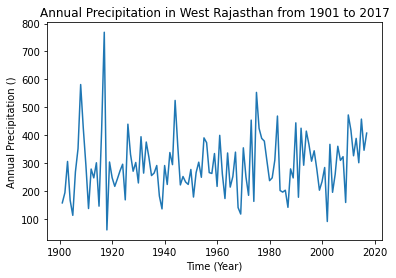

In [10]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(precip['YEAR'], precip['ANNUAL'])

ax.set_xlabel('Time (Year)')
ax.set_ylabel('Annual Precipitation ()')
ax.set_title('Annual Precipitation in West Rajasthan from 1901 to 2017');

# can see trends of the annual precipitation from 1901 to 2017

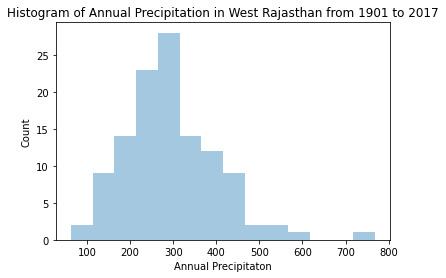

In [11]:
# histogram of annual precipitation
sns.distplot(precip['ANNUAL'], kde=False)
plt.xlabel("Annual Precipitaton")
plt.ylabel("Count")
plt.title("Histogram of Annual Precipitation in West Rajasthan from 1901 to 2017");

#### Note from Professor: 
"Unfortunately for time series data, logistic regression is not ideal, since it is intended for performing classification. Can you find out the historical average values per month and then create a feature that is binary regarding if the outputs are less than or equal to the average or not? That could be a dependent variable and you could then try to model using the previous months' levels of precipitation as "assumed" independent features (just for the sake of getting more experience with logistic regression and classification). Also, what are the descriptions for the last 4 columns of your data?"

* Based on this source(https://www.nature.com/articles/s41598-019-47933-8), the last 4 columns of data are the amount of precipitation during different times of the year: 
* JF = dry season (Jan & Feb)
* MAM = long rain season (March, April, May)
* JJAS = Boreal summer season (June, July, Aug, Sept)
* OND = short rain season (Oct, Nov, Dec)

In [12]:
# montly_mean has the average rainfall per month from the year 1901 to 2017
monthly_mean

JAN     3.323077
FEB     4.862393
MAR     4.011111
APR     3.541880
MAY     9.539316
JUN    29.131624
JUL    96.105983
AUG    94.947863
SEP    39.928205
OCT     5.194872
NOV     1.643590
DEC     1.885470
Name: mean, dtype: float64

In [13]:
df_precip = precip
df_precip

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1849,West Rajasthan,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1,1850,West Rajasthan,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
2,1851,West Rajasthan,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
3,1852,West Rajasthan,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
4,1853,West Rajasthan,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1961,West Rajasthan,2013,8.6,21.8,4.2,3.1,1.7,37.6,104.5,138.2,58.7,10.1,1.0,0.0,389.4,30.4,8.9,339.0,11.1
113,1962,West Rajasthan,2014,0.8,2.2,4.7,8.4,23.0,13.8,94.3,69.6,84.9,0.5,0.2,0.0,302.4,3.0,36.0,262.6,0.7
114,1963,West Rajasthan,2015,1.4,0.9,30.3,25.2,15.5,53.2,234.6,60.5,35.7,1.1,0.1,0.0,458.4,2.3,71.0,384.0,1.2
115,1964,West Rajasthan,2016,0.1,1.6,6.7,0.4,4.0,33.2,80.0,191.9,11.0,18.1,0.0,0.0,347.0,1.7,11.1,316.1,18.1


# Model using independent variable as precipitation and dependent variable as binary

In [14]:
# binary value for if year monthly mean is greater or less than monthly mean of time period
# 1 is greater than the average and 0 is less than average 
a = []
for i in df_precip['JAN']:
    if i > monthly_mean['JAN']:
        a.append(1)
    else:
        a.append(0)

df_binary_test = pd.DataFrame()
df_binary_test['Jan_bi'] = a
df_binary_test

,Jan_bi
0,1
1,0
2,0
3,1
4,1
...,...
112,1
113,0
114,0
115,0


In [15]:
# months in string format of df_precip to be used in the loop to create the binary variables
columns = df_precip.columns

string_months = columns[3:15]
string_months

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [16]:
type(string_months)

pandas.core.indexes.base.Index

In [17]:
# binary value for if year monthly mean is greater or less than monthly mean of time period
# 1 is greater than the average and 0 is less than average 

# dataframe where binary values will be stored
df_binary = pd.DataFrame()

# for loops to go through each month and row
for month in string_months:  # loop through the months 
    a = []
    for i in df_precip[month]:   # loop through the rows
        if i > monthly_mean[month]:
            a.append(1)
        else:
            a.append(0)
            
    df_binary[month + '_bi'] = a

df_binary.head()

,JAN_bi,FEB_bi,MAR_bi,APR_bi,MAY_bi,JUN_bi,JUL_bi,AUG_bi,SEP_bi,OCT_bi,NOV_bi,DEC_bi
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,0,1,0,0,0,1,0,1,0,0,0
3,1,0,1,0,1,0,0,0,0,0,1,1
4,1,0,0,0,0,0,0,0,1,0,0,0


In [18]:
df_binary.to_csv('df_binary.csv')

In [19]:
df_binary['JAN_bi'].value_counts()

0    83
1    34
Name: JAN_bi, dtype: int64

In [20]:
pct_above_avg = 34/(83+34)
pct_above_avg

0.2905982905982906

In [21]:
df_binary.describe()

# used describe to find the means of the 0s and 1s
# For example, in January, 29% of the January monthly precipitation values were above the January monthly mean from 1901 to 2017

,JAN_bi,FEB_bi,MAR_bi,APR_bi,MAY_bi,JUN_bi,JUL_bi,AUG_bi,SEP_bi,OCT_bi,NOV_bi,DEC_bi
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,0.290598,0.264957,0.307692,0.264957,0.350427,0.393162,0.435897,0.401709,0.410256,0.222222,0.196581,0.239316
std,0.455991,0.443209,0.463524,0.443209,0.479156,0.490553,0.498007,0.492352,0.493996,0.417528,0.399122,0.428501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# merge the df_precip and df_binary
# merge two dataframes on index of both the dataframes
merged_df = df_precip.merge(df_binary, left_index=True, right_index=True)
display(merged_df.head())
print(merged_df.columns)

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,MAR_bi,APR_bi,MAY_bi,JUN_bi,JUL_bi,AUG_bi,SEP_bi,OCT_bi,NOV_bi,DEC_bi
0,1849,West Rajasthan,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,...,0,0,0,0,0,0,0,0,0,0
1,1850,West Rajasthan,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,...,0,0,0,1,0,0,1,0,0,0
2,1851,West Rajasthan,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,...,1,0,0,0,1,0,1,0,0,0
3,1852,West Rajasthan,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,...,1,0,1,0,0,0,0,0,1,1
4,1853,West Rajasthan,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,...,0,0,0,0,0,0,1,0,0,0


Index(['index', 'SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM',
       'JJAS', 'OND', 'JAN_bi', 'FEB_bi', 'MAR_bi', 'APR_bi', 'MAY_bi',
       'JUN_bi', 'JUL_bi', 'AUG_bi', 'SEP_bi', 'OCT_bi', 'NOV_bi', 'DEC_bi'],
      dtype='object')


In [23]:
monthly_precip_only = merged_df[merged_df.columns[3:15]].T
monthly_precip_only

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
JAN,6.7,0.0,1.7,3.8,6.3,0.1,0.6,8.5,1.9,2.2,...,1.6,2.9,1.9,0.0,0.5,8.6,0.8,1.4,0.1,6.0
FEB,0.0,0.0,1.3,2.9,4.8,39.1,24.5,0.2,6.5,0.2,...,0.2,2.8,1.7,11.8,0.0,21.8,2.2,0.9,1.6,0.3
MAR,1.1,0.0,5.5,16.3,0.7,7.8,6.3,0.0,0.0,0.0,...,0.8,5.3,0.6,1.5,0.0,4.2,4.7,30.3,6.7,4.2
APR,0.0,0.5,0.0,0.7,1.3,0.0,7.3,3.8,23.7,3.6,...,18.2,1.6,0.6,1.5,9.5,3.1,8.4,25.2,0.4,3.3
MAY,6.1,4.0,4.2,11.4,0.3,0.2,6.8,6.6,2.3,0.3,...,24.7,7.6,3.0,7.8,10.4,1.7,23.0,15.5,4.0,26.1
JUN,3.0,49.1,2.7,14.6,4.9,19.9,12.8,28.4,29.2,67.3,...,56.1,26.1,49.5,24.4,5.3,37.6,13.8,53.2,33.2,81.9
JUL,79.0,27.0,154.8,39.8,30.1,53.7,52.2,208.9,158.2,50.5,...,57.1,79.1,129.9,88.5,40.4,104.5,94.3,234.6,80.0,219.7
AUG,59.2,71.3,87.1,45.6,0.6,58.6,242.5,265.8,73.9,156.6,...,133.3,27.1,163.4,166.8,166.7,138.2,69.6,60.5,191.9,43.1
SEP,1.0,41.8,49.3,21.4,64.5,87.1,0.2,56.8,114.5,12.2,...,23.0,7.5,96.5,116.3,92.0,58.7,84.9,35.7,11.0,21.2
OCT,2.1,1.8,0.1,1.4,0.0,0.7,0.1,2.0,0.6,0.5,...,0.4,0.3,0.9,0.1,1.9,10.1,0.5,1.1,18.1,0.0


In [24]:
# testing how to append the first row into a column of data, then the second row
a = pd.DataFrame()
b = pd.DataFrame()

a['precip'] = merged_df[merged_df.columns[3:15]].T.iloc[0]
display(a)
b['precip'] = monthly_precip_only.iloc[1]
display(b)
a = a.append(b)
display(a)

,precip
0,6.7
1,0.0
2,1.7
3,3.8
4,6.3
...,...
112,8.6
113,0.8
114,1.4
115,0.1


,precip
0,0.0
1,0.0
2,1.3
3,2.9
4,4.8
...,...
112,21.8
113,2.2
114,0.9
115,1.6


,precip
0,6.7
1,0.0
2,1.7
3,3.8
4,6.3
...,...
112,21.8
113,2.2
114,0.9
115,1.6


In [25]:
# binary only
binary_only = merged_df[merged_df.columns[20:]].T
binary_only

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
JAN_bi,1,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
FEB_bi,0,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
MAR_bi,0,0,1,1,0,1,1,0,0,0,...,0,1,0,0,0,1,1,1,1,1
APR_bi,0,0,0,0,0,0,1,1,1,1,...,1,0,0,0,1,0,1,1,0,0
MAY_bi,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,0,1
JUN_bi,0,1,0,0,0,0,0,0,1,1,...,1,0,1,0,0,1,0,1,1,1
JUL_bi,0,0,1,0,0,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
AUG_bi,0,0,0,0,0,0,1,1,0,1,...,1,0,1,1,1,1,0,0,1,0
SEP_bi,0,1,1,0,1,1,0,1,1,0,...,0,0,1,1,1,1,1,0,0,0
OCT_bi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
# list of months (numerical)
months_list = list(range(1, 13))
print(months_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [27]:
# list of years for the data 
first_year = 1901 
last_year = 2017
years_list = list(range(first_year, last_year+1))
print(years_list)

[1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [28]:
# appending precip and binary
a = pd.DataFrame()
b = pd.DataFrame()

a['precip'] = monthly_precip_only.iloc[0]
a['binary'] = binary_only.iloc[0]
a['month'] = months_list[0]
a['year'] = years_list[0]

print(a)
b['precip'] = monthly_precip_only.iloc[1]
b['binary'] = binary_only.iloc[1]
b['month'] = months_list[1]
b['year'] = years_list[1]
print(b)
a = a.append(b)
print(a)

     precip  binary  month  year
0       6.7       1      1  1901
1       0.0       0      1  1901
2       1.7       0      1  1901
3       3.8       1      1  1901
4       6.3       1      1  1901
..      ...     ...    ...   ...
112     8.6       1      1  1901
113     0.8       0      1  1901
114     1.4       0      1  1901
115     0.1       0      1  1901
116     6.0       1      1  1901

[117 rows x 4 columns]
     precip  binary  month  year
0       0.0       0      2  1902
1       0.0       0      2  1902
2       1.3       0      2  1902
3       2.9       0      2  1902
4       4.8       0      2  1902
..      ...     ...    ...   ...
112    21.8       1      2  1902
113     2.2       0      2  1902
114     0.9       0      2  1902
115     1.6       0      2  1902
116     0.3       0      2  1902

[117 rows x 4 columns]
     precip  binary  month  year
0       6.7       1      1  1901
1       0.0       0      1  1901
2       1.7       0      1  1901
3       3.8       1      1  

for each month want to get a row, keep only the month rain values, transpose it, and add to column of precipiation
do the same for the binary values

In [29]:
b = pd.DataFrame()
transposed = pd.DataFrame()

for i in range(0, 12):
    b['precip'] = monthly_precip_only.iloc[i]
    b['binary'] = binary_only.iloc[i]
    b['month'] = months_list[i]
    b['year'] = years_list[i]
    transposed = transposed.append(b)

transposed

,precip,binary,month,year
0,6.7,1,1,1901
1,0.0,0,1,1901
2,1.7,0,1,1901
3,3.8,1,1,1901
4,6.3,1,1,1901
...,...,...,...,...
112,0.0,0,12,1912
113,0.0,0,12,1912
114,0.0,0,12,1912
115,0.0,0,12,1912


In [30]:
transposed.to_csv('binary_and_precip_transposed.csv')

In [31]:
len(transposed)

1404

In [32]:
# splitting up data
# splits into roughly equally sized 
# shuffle - shuffles before splitting the data

# random state - the random way we are selecting is going to be the same everytime so it is repeatable, a seed and how we do the shuffle
cv = KFold(n_splits=10, shuffle=True, random_state=0)  # making 10 fold - each are going to have 10% of the data
for train_index, test_index in cv.split(transposed):
    print("TRAIN:", train_index, "TEST:", test_index)
    
# the indicies in train should not be in test

TRAIN: [   0    1    2 ... 1399 1400 1402] TEST: [   4    5   19   27   31   34   45   52   54   55   85  108  141  142
  148  152  159  161  184  192  202  211  224  227  231  233  241  247
  254  268  278  298  303  308  312  326  362  363  376  412  418  420
  426  438  445  458  461  467  471  472  477  487  500  526  528  529
  533  536  542  554  557  563  565  568  569  572  587  608  609  610
  634  638  642  649  654  656  678  704  708  711  717  740  757  758
  759  761  762  768  788  792  795  798  826  846  877  887  901  911
  918  920  922  935  946  963  980  983  986 1000 1002 1010 1024 1032
 1034 1038 1041 1063 1070 1127 1150 1154 1168 1174 1179 1183 1222 1235
 1252 1257 1259 1261 1270 1298 1299 1332 1347 1349 1372 1375 1396 1401
 1403]
TRAIN: [   0    3    4 ... 1401 1402 1403] TEST: [   1    2    8    9   14   18   29   39   40   47   53   56   58   61
   75   80   92  124  140  156  182  186  198  204  215  253  260  270
  279  295  299  302  310  315  317  319  3

In [33]:
# looking at the size of the test and train
cv = KFold(n_splits=10, shuffle=True, random_state=0)
for train_index, test_index in cv.split(transposed):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))

TRAIN: 1263 TEST: 141
TRAIN: 1263 TEST: 141
TRAIN: 1263 TEST: 141
TRAIN: 1263 TEST: 141
TRAIN: 1264 TEST: 140
TRAIN: 1264 TEST: 140
TRAIN: 1264 TEST: 140
TRAIN: 1264 TEST: 140
TRAIN: 1264 TEST: 140
TRAIN: 1264 TEST: 140


In [34]:
from sklearn.metrics import precision_score 
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [35]:
transposed.head()

,precip,binary,month,year
0,6.7,1,1,1901
1,0.0,0,1,1901
2,1.7,0,1,1901
3,3.8,1,1,1901
4,6.3,1,1,1901


In [36]:
# Define function
cv = KFold(n_splits=10, shuffle=True, random_state=0)

# Create for-loop
for train_index, test_index in cv.split(df_binary):

    # Define training and test sets
    X_train = transposed.loc[train_index].drop(['year', 'month', 'binary'], axis=1)
    y_train = transposed.loc[train_index]['binary']    # what we want to predict
    X_test = transposed.loc[test_index].drop(['year', 'month', 'binary'], axis=1)
    y_test = transposed.loc[test_index]['binary']
    
        
    # Fit model
    clf = LogisticRegression(max_iter = 10000)  # model operator based on logistic regression, set max iterations
    clf.fit(X_train, y_train)

    # Generate predictions
    predicted = clf.predict(X_test)  # predicted model and output using this subset
    
    # Compare to actual outcomes and return precision (dont want a really long number so round)
    print('Precision: ', (round(precision_score(y_test, predicted)*100,1))) 

Precision:  85.7
Precision:  79.3
Precision:  73.1
Precision:  54.5
Precision:  65.0
Precision:  61.5
Precision:  69.6
Precision:  65.2
Precision:  50.0
Precision:  52.2


In [37]:
# cross validation by month
# using all the months prioir to current month as training data

months = np.sort(transposed.month.unique())

for month in range(2,13):
    test = transposed[transposed.month==month]
    train = transposed[(transposed.month < month)]

    print('Test Month: '+str(test.month.unique()), 'Training Months: '+str(train.month.unique()))

Test Month: [2] Training Months: [1]
Test Month: [3] Training Months: [1 2]
Test Month: [4] Training Months: [1 2 3]
Test Month: [5] Training Months: [1 2 3 4]
Test Month: [6] Training Months: [1 2 3 4 5]
Test Month: [7] Training Months: [1 2 3 4 5 6]
Test Month: [8] Training Months: [1 2 3 4 5 6 7]
Test Month: [9] Training Months: [1 2 3 4 5 6 7 8]
Test Month: [10] Training Months: [1 2 3 4 5 6 7 8 9]
Test Month: [11] Training Months: [ 1  2  3  4  5  6  7  8  9 10]
Test Month: [12] Training Months: [ 1  2  3  4  5  6  7  8  9 10 11]


In [38]:
months = np.sort(transposed.month.unique())

for month in range(2,13):  # in the month of month 2 to 12 -- (in range index up to 13 bc includes up to 13)

    test = transposed[transposed.month==month]
    train = transposed[(transposed.month < month)]
    X_train = transposed.loc[train_index].drop(['year', 'month', 'binary'], axis=1)
    y_train = transposed.loc[train_index]['binary']    # what we want to predict
    X_test = transposed.loc[test_index].drop(['year', 'month', 'binary'], axis=1)
    y_test = transposed.loc[test_index]['binary']
        
    clf = LogisticRegression(max_iter = 10000)
    clf.fit(X_train, y_train)
    predicted = clf.predict(X_test)
    print('Precision for Month '+str(month)+': ',round(precision_score(y_test, predicted)*100,1))

Precision for Month 2:  52.2
Precision for Month 3:  52.2
Precision for Month 4:  52.2
Precision for Month 5:  52.2
Precision for Month 6:  52.2
Precision for Month 7:  52.2
Precision for Month 8:  52.2
Precision for Month 9:  52.2
Precision for Month 10:  52.2
Precision for Month 11:  52.2
Precision for Month 12:  52.2


In [39]:
# random forest classifer from lesson 9
# Define function
cv = KFold(n_splits=10, shuffle=True, random_state=0)

# Create for-loop
for train_index, test_index in cv.split(df_binary):

    # Define training and test sets
    X_train = transposed.loc[train_index].drop(['year', 'month', 'binary'], axis=1)
    y_train = transposed.loc[train_index]['binary']    # what we want to predict
    X_test = transposed.loc[test_index].drop(['year', 'month', 'binary'], axis=1)
    y_test = transposed.loc[test_index]['binary']
    
        
    # Fit model
    clf = RandomForestClassifier(random_state=1)
    clf.fit(X_train, y_train)

    # Generate predictions
    predicted = clf.predict(X_test)  # predicted model and output using this subset
    
    # Compare to actual outcomes and return precision (dont want a really long number so round)
    print('Precision: ', (round(precision_score(y_test, predicted)*100,1))) 

Precision:  72.7
Precision:  79.2
Precision:  56.0
Precision:  61.4
Precision:  52.8
Precision:  55.8
Precision:  70.2
Precision:  71.4
Precision:  75.6
Precision:  48.7
